<a href="https://colab.research.google.com/github/udaysinh-git/College-SEM-5-AIML/blob/main/qcai_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install qiskit
!pip install qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

In [6]:
def map_point_to_angles(x,y):
  theta = x * np.pi
  phi = y * 2 * np.pi
  return theta, phi

In [7]:
def bloch_vector_from_statevector(statevec):
  a , b = statevec[0], statevec[1]
  x = 2 * np.real(a * np.conj(b))
  y = 2 * np.imag(b * np.conj(a))
  z = np.abs(a)**2 - np.abs(b)**2
  return np.array([x,y,z])

In [8]:
points = [(0.1, 0.2),(0.4,0.8),(0.7,0.3),(1.0,1.0),(0.5,0.5)]

In [9]:
bloch_vector = []
for x , y in points:
  theta, phi = map_point_to_angles(x,y)
  qc = QuantumCircuit(1)
  qc.ry(theta, 0)
  qc.rz(phi, 0)
  sv = Statevector.from_instruction(qc)
  bloch_vector.append(bloch_vector_from_statevector(sv.data))

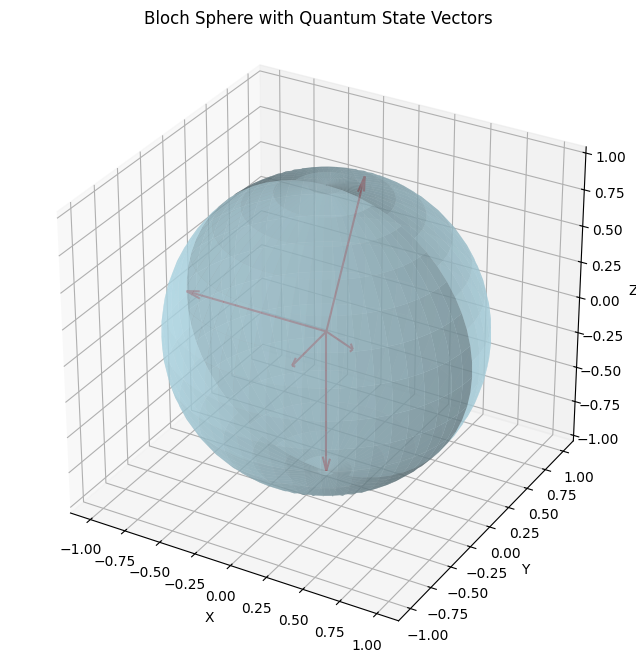

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

u,v = np.mgrid[0:2*np.pi:60j,0 : np.pi:30j]
x_sphere = np.sin(u) * np.cos(v)
y_sphere = np.sin(u) * np.sin(v)
z_sphere = np.cos(u)
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.6, rcount=30, ccount=30)

for vec in bloch_vector:
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='red', arrow_length_ratio=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bloch Sphere with Quantum State Vectors')
ax.set_aspect('equal')

plt.show()
